<a href="https://colab.research.google.com/github/JoshuaHaga/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [37]:
# YOUR WORK HERE
import pandas as pd
import numpy as np
import scipy as stat 
from scipy.stats import chisquare, chi2_contingency
from scipy.stats import ttest_ind, ttest_1samp
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

--2020-07-28 20:20:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip.3’

student.zip.3       100%[===================>]  20.00K  --.-KB/s    in 0.1s    

2020-07-28 20:20:13 (154 KB/s) - ‘student.zip.3’ saved [20478/20478]



In [3]:
!unzip '/content/student.zip'

Archive:  /content/student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [8]:
scores = pd.read_csv('/content/student-mat.csv', sep=';' )
scores.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [5]:
scores.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


In [13]:
# YOUR WORK HERE
# NULL: Failures are not dependant on sex
scores_m = scores[scores['sex']== 'M']
scores_f = scores[scores['sex']== 'F']


In [44]:
xtab = pd.crosstab(scores['sex'], scores['failures'])
xtab

failures,0,1,2,3
sex,,,,
F,168,23,11,6
M,144,27,6,10


In [43]:
chi2_contingency(xtab)

(3.5302645725647808,
 0.31685806856495097,
 3,
 array([[164.29367089,  26.32911392,   8.95189873,   8.42531646],
        [147.70632911,  23.67088608,   8.04810127,   7.57468354]]))

In [ ]:
#The pvalue suggests that the null hypothesis has been rejected and there is a connectoin between gender and failure

In [50]:
#Determing if scores are dependent on gender

cut_points = [-1,10, 15, 100]
scores['math_score'] = pd.cut(scores['G3'], cut_points, labels = ['low', 'med', 'hi'])
scores['math_score'].value_counts().sort_index()

low    186
med    169
hi      40
Name: math_score, dtype: int64

In [52]:
scores['sex'].value_counts()


F    208
M    187
Name: sex, dtype: int64

In [100]:
score_mf = pd.crosstab(scores['sex'], scores['math_score'], )
score_mf

math_score,low,med,hi
sex,,,
F,105,87,16
M,81,82,24


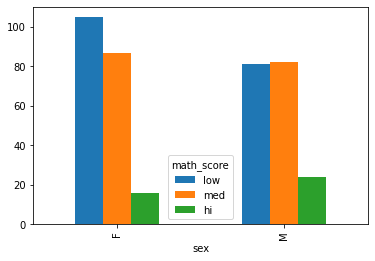

In [101]:
score_mf.plot(kind = 'bar');

In [102]:
chi2_stat, p_val, dof, ex = chi2_contingency(score_mf)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)



===Chi2 Stat===
3.7388151406967447


===Degrees of Freedom===
2


===P-Value===
0.15421499629436364


===Contingency Table===
[[97.9443038  88.99240506 21.06329114]
 [88.0556962  80.00759494 18.93670886]]


### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

In [ ]:
# YOUR WORK HERE

In [237]:
score_mf2 = pd.crosstab(scores['sex'], scores['math_score'])
score_mf2

math_score,low,med,hi
sex,,,
F,105,87,16
M,81,82,24


In [238]:
total = 395
total

395

In [249]:
observed = score_mf2.values

In [ ]:
sample_size = scores.shape[0]
sample_size

In [256]:
row_totals = scores['sex'].value_counts().sort_index().values
row_totals

array([208, 187])

In [257]:
col_totals = scores['math_score'].value_counts().sort_index().values
col_totals

array([186, 169,  40])

In [245]:
expected = []

array([[21.06329114, 21.06329114],
       [18.93670886, 18.93670886],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [247]:
observed = pd.crosstab(scores['sex'], scores['math_score'], ).values
print(observed.shape)
observed

(2, 3)


array([[105,  87,  16],
       [ 81,  82,  24]])

In [248]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

ValueError: ignored

## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [ ]:
# YOUR WORK HERE



### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

- What are hypothesis test? How are they useful?

- What is a "null hypothesis?"

- What is a p-value and what does it represent?

- What does it mean for something to be "statistically significant?"

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)